# Module 2: Text into Data: Importing a Text

* DS 5001: Exploratory Text Analytics
* Raf Alvarado

# Set Up

In [1]:
# epub_file = "../MOD01--SetUp/pg105.txt"
epub_file = "data/pg105.txt"
csv_file = 'austen-persuasion.csv'

In [2]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [3]:
import pandas as pd
%matplotlib inline

# Import file into a dataframe

In [4]:
epub = open(epub_file, 'r', encoding='utf-8-sig').readlines()
df = pd.DataFrame(epub, columns=['line_str'])
df.index.name = 'line_num'
df.line_str = df.line_str.str.strip()

In [5]:
df.sample(10)

,line_str
line_num,
6558,last farthing with him; and I know that his pu...
5927,"though late, and reluctant, and ungracious, wa..."
3805,"waiting, stationed for their convenience in th..."
2186,patronize in vain--which taste cannot tolerate...
1325,
4364,"Christmas holidays."""
2435,Wentworth' sounds very well. That would be a ...
3905,more useful person in the old nursery-maid of ...
4038,had passed into better hands than its owners'....


# Extract title of work from first line

In [6]:
title = df.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')
df['title'] = title

In [7]:
print(title)

Persuasion, by Jane Austen


In [8]:
df.head()

,line_str,title
line_num,,
0,"The Project Gutenberg EBook of Persuasion, by ...","Persuasion, by Jane Austen"
1,,"Persuasion, by Jane Austen"
2,This eBook is for the use of anyone anywhere a...,"Persuasion, by Jane Austen"
3,almost no restrictions whatsoever. You may co...,"Persuasion, by Jane Austen"
4,re-use it under the terms of the Project Guten...,"Persuasion, by Jane Austen"


# Remove Gutenberg's front and back matter

In [9]:
a = df.line_str.str.match(r"\*\*\*\s*START OF (THE|THIS) PROJECT")
b = df.line_str.str.match(r"\*\*\*\s*END OF (THE|THIS) PROJECT")

In [10]:
an = df.loc[a].index[0]
bn = df.loc[b].index[0]

In [11]:
df = df.loc[an + 1 : bn - 2]

In [12]:
df

,line_str,title
line_num,,
19,,"Persuasion, by Jane Austen"
20,,"Persuasion, by Jane Austen"
21,,"Persuasion, by Jane Austen"
22,,"Persuasion, by Jane Austen"
23,Produced by Sharon Partridge and Martin Ward. ...,"Persuasion, by Jane Austen"
...,...,...
8367,,"Persuasion, by Jane Austen"
8368,,"Persuasion, by Jane Austen"
8369,,"Persuasion, by Jane Austen"


# Chunk by chapter

## Find all chapter headers

In [13]:
chap_lines = df.line_str.str.match(r"^\s*(chapter|letter)\s+(\d+)", case=False)

In [14]:
df.loc[chap_lines]

,line_str,title
line_num,,
47,Chapter 1,"Persuasion, by Jane Austen"
306,Chapter 2,"Persuasion, by Jane Austen"
500,Chapter 3,"Persuasion, by Jane Austen"
786,Chapter 4,"Persuasion, by Jane Austen"
959,Chapter 5,"Persuasion, by Jane Austen"
1297,Chapter 6,"Persuasion, by Jane Austen"
1657,Chapter 7,"Persuasion, by Jane Austen"
1992,Chapter 8,"Persuasion, by Jane Austen"
2346,Chapter 9,"Persuasion, by Jane Austen"


## Assign numbers to chapters

In [15]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]

In [16]:
df.loc[chap_lines, 'chap_num'] = chap_nums

## Forward-fill chapter numbers to following text lines

In [17]:
df.chap_num = df.chap_num.ffill()

## Clean up

In [18]:
df = df.loc[~df.chap_num.isna()] # Remove chapter heading lines
df = df.loc[~chap_lines] # Remove everything before Chapter 1
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

In [19]:
df.sample(10)

,line_str,title,chap_num
line_num,,,
5690,carriage; and they had just reached this point...,"Persuasion, by Jane Austen",19
2466,"land in the country. I grant you, that any of...","Persuasion, by Jane Austen",9
2837,morning visit to your aunt was in question; an...,"Persuasion, by Jane Austen",10
2387,insignificant compared with Mr Musgrove's; and...,"Persuasion, by Jane Austen",9
508,very responsible tenants. Many a noble fortun...,"Persuasion, by Jane Austen",3
2966,"towards her, which all these things made appar...","Persuasion, by Jane Austen",10
1409,"gadding about the village, all day long. I me...","Persuasion, by Jane Austen",6
5380,,"Persuasion, by Jane Austen",18
5097,"company, paltry rooms, foul air, disgusting as...","Persuasion, by Jane Austen",17


## Group lines by chapter num 

In [20]:
dfc = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string

In [21]:
dfc.head()

,line_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n""I must take leave to observe, Sir Walter,..."
4,"\n\nHe was not Mr Wentworth, the former curate..."
5,\n\nOn the morning appointed for Admiral and M...


# Split into paragraphs 

In [22]:
dfp = dfc['line_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'para_str'})

In [23]:
dfp.head()

para_str
chap_num                                                     
1        0                                                   
         1  Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                          "ELLIOT OF KELLYNCH HALL.
         3  "Walter Elliot, born March 1, 1760, married, J...
         4  Precisely such had the paragraph originally st...

In [24]:
dfp.index.names = OHCO[:2]

In [25]:
dfp.head()

para_str
chap_num para_num                                                   
1        0                                                          
         1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...

In [26]:
dfp['para_str'] = dfp['para_str'].str.replace(r'\n', ' ').str.strip()
dfp = dfp[~dfp['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

/var/folders/pn/dgy7ckd90nl7mlj6g6rc_1kw0000gn/T/ipykernel_42429/3422525513.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfp['para_str'] = dfp['para_str'].str.replace(r'\n', ' ').str.strip()


In [27]:
dfp.head()

para_str
chap_num para_num                                                   
1        1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...
         5         Then followed the history and rise of the anci...

# Split into sentences

NOTE: ADDED `"` to regex in `split()`

In [28]:
dfs = dfp['para_str'].str.split(r'[.?!;:"]+', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

In [29]:
dfs.index.names = OHCO[:3]

In [30]:
dfs = dfs[~dfs['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [31]:
dfs.head()

sent_str
chap_num para_num sent_num                                                   
1        1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1          there he found occupation for an idle hour, a...
                  2          there his faculties were roused into admirati...
                  3          there any unwelcome sensations, arising from ...
                  4          and there, if every other leaf were powerless...

# Split into tokens

In [32]:
dft = dfs['sent_str'].str.split(r"[\s',-]+", expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})

In [33]:
dft.index.names = OHCO[:4]

In [34]:
dft.head()

token_str
chap_num para_num sent_num token_num          
1        1        0        0               Sir
                           1            Walter
                           2            Elliot
                           3                of
                           4          Kellynch

# Gathering by Content Object

In [35]:
sents = dft.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = dft.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = dft.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

In [36]:
def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

In [37]:
sents.sample(10)

,,,content
chap_num,para_num,sent_num,
3,20,0,Mr Shepherd answered for his being of a gentle...
23,1,3,Her faith was plighted and Mr Elliot s charac...
21,40,10,repeated Anne laughing
20,18,2,He was gone
15,17,11,With all the state which a butler and foot bo...
22,1,4,and the evil of his attentions last night the...
23,42,14,I had not waited even these ten days could I ...
12,7,5,and this second meeting short as it was also ...
16,20,2,said Anne


<AxesSubplot:title={'center':'Tokens'}, ylabel='Frequency'>

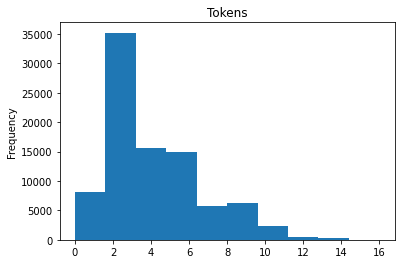

In [38]:
dft.token_str.str.len().plot.hist(bins=10, title="Tokens")

<AxesSubplot:title={'center':'Sentences'}, ylabel='Frequency'>

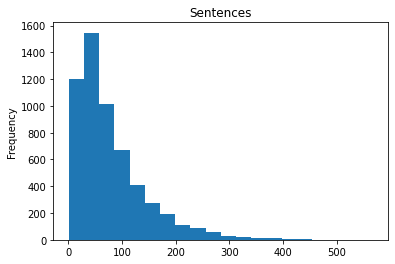

In [39]:
sents.content.str.len().plot.hist(bins=20, title='Sentences')

<AxesSubplot:title={'center':'Paragraphs'}, ylabel='Frequency'>

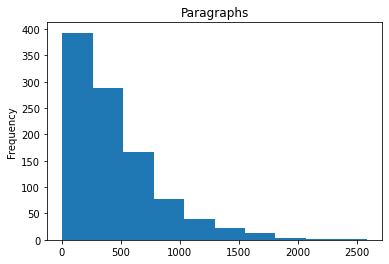

In [40]:
paras.content.str.len().plot.hist(title="Paragraphs")

<AxesSubplot:title={'center':'Chapters'}, ylabel='Frequency'>

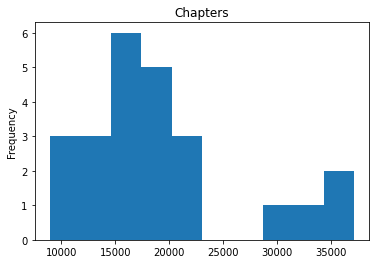

In [41]:
chaps.content.str.len().plot.hist(title="Chapters")

# Save work to CSV

In [42]:
dft.to_csv(csv_file)